In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib.patches import Patch

# Definition fonctions

In [2]:
df = pd.read_table("../data/Consolidated_data.txt")

In [3]:
df.head()

,Path,Sample Name,Tissue Category,Cell ID,Cell X Position,Cell Y Position,Nucleus Area (square microns),Nucleus DAPI (DAPI) Mean,Nucleus CK (Opal 480) Mean,Nucleus CLec9A (Opal 520) Mean,...,Annotation ID,Phenotype Other.x,Phenotype CD8,Phenotype Tumor_cells,Phenotype Mature_DC,Phenotype Pneumocyte,Phenotype Other.y,Phenotype cDC2,Phenotype cDC1,Phenotype pDC
0,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19071,13797.1,43511.7,70.6,1.237,0.486,0.002,...,"DC2 LUNG 18H011604_Scan1_[13348,43590]",Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-
1,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19072,13798.1,43529.6,22.5,8.921,0.474,0.036,...,"DC2 LUNG 18H011604_Scan1_[13348,43590]",Other-,CD8+,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-
2,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19073,13806.5,43560.9,16.3,2.795,0.621,0.027,...,"DC2 LUNG 18H011604_Scan1_[13348,43590]",Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-
3,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19074,13809.0,43573.3,15.1,2.830,0.260,0.000,...,"DC2 LUNG 18H011604_Scan1_[13348,43590]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19075,13777.7,43584.2,19.7,3.754,0.494,0.010,...,"DC2 LUNG 18H011604_Scan1_[13348,43590]",Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-


In [4]:
df.columns

Index(['Path', 'Sample Name', 'Tissue Category', 'Cell ID', 'Cell X Position',
       'Cell Y Position', 'Nucleus Area (square microns)',
       'Nucleus DAPI (DAPI) Mean', 'Nucleus CK (Opal 480) Mean',
       'Nucleus CLec9A (Opal 520) Mean', 'Nucleus Clec10A (Opal 570) Mean',
       'Nucleus CD8 (Opal 620) Mean', 'Nucleus BDCA2 (Opal 690) Mean',
       'Nucleus DC-LAMP (Opal 780) Mean', 'Membrane Area (square microns)',
       'Membrane DAPI (DAPI) Mean', 'Membrane CK (Opal 480) Mean',
       'Membrane CLec9A (Opal 520) Mean', 'Membrane Clec10A (Opal 570) Mean',
       'Membrane CD8 (Opal 620) Mean', 'Membrane BDCA2 (Opal 690) Mean',
       'Membrane DC-LAMP (Opal 780) Mean', 'Entire Cell Area (square microns)',
       'Entire Cell DAPI (DAPI) Mean', 'Entire Cell CK (Opal 480) Mean',
       'Entire Cell CLec9A (Opal 520) Mean',
       'Entire Cell Clec10A (Opal 570) Mean',
       'Entire Cell CD8 (Opal 620) Mean', 'Entire Cell BDCA2 (Opal 690) Mean',
       'Entire Cell DC-LAMP (Opal

In [5]:
def qc_df(df):
    """
    Créer une nouvelle colonne dans le data frame qui 
    donne le phénotype des cellules en se basant sur les marqueurs
    """
    temp = df.copy()
    
    # Remove poor quality cells
    cells_to_remove = [i for i in df.index if df.loc[i, "Tissue Category"] in ["artefact", "Empty"]]
    temp = df.drop(cells_to_remove)


    # Define phenotypes
    temp["celltype"] = temp["Phenotype Other.y"]
    temp.loc[temp["Phenotype pDC"] == "pDC+","celltype"] = "pDC"
    temp.loc[temp["Phenotype cDC2"] == "cDC2+","celltype"] = "cDC2"
    temp.loc[temp["Phenotype cDC1"] == "cDC1+","celltype"] = "cDC1"
    temp.loc[temp["Phenotype Mature_DC"] == "Mature_DC+","celltype"] = "Mature_DC"
    

    temp.loc[temp["Phenotype CD8"] == "CD8+","celltype"] = "CD8"
    temp.loc[temp["Phenotype Pneumocyte"] == "Pneumocyte+","celltype"] = "Pneumocyte"
    temp.loc[temp["Phenotype Tumor_cells"] == "Tumor_cells+","celltype"] = "Tumor_cells"


    temp.dropna(inplace = True)
    
    return(temp)

In [6]:
df_clean = qc_df(df)



print(df.shape)
print(df_clean.shape)


df_clean["celltype"].value_counts()

(45921, 41)
(45558, 42)


celltype
Other+         35776
CD8             7809
Tumor_cells     1774
cDC2             166
pDC               16
cDC1              11
Mature_DC          3
Pneumocyte         3
Name: count, dtype: int64

In [7]:
def rearrange_df(df, columns_to_keep, index_col):
    """
    Selectionne uniquement les colonnes d'intéret

    index_col doit être dans columns_to_keep
    """
    
    temp = df.copy()
    temp = temp[columns_to_keep]
    temp.index = temp[index_col]
    temp = temp.drop(index_col, axis = 1)

    return(temp)

In [8]:
df_clean.head()

,Path,Sample Name,Tissue Category,Cell ID,Cell X Position,Cell Y Position,Nucleus Area (square microns),Nucleus DAPI (DAPI) Mean,Nucleus CK (Opal 480) Mean,Nucleus CLec9A (Opal 520) Mean,...,Phenotype Other.x,Phenotype CD8,Phenotype Tumor_cells,Phenotype Mature_DC,Phenotype Pneumocyte,Phenotype Other.y,Phenotype cDC2,Phenotype cDC1,Phenotype pDC,celltype
0,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19071,13797.1,43511.7,70.6,1.237,0.486,0.002,...,Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-,Other+
1,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19072,13798.1,43529.6,22.5,8.921,0.474,0.036,...,Other-,CD8+,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-,CD8
2,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19073,13806.5,43560.9,16.3,2.795,0.621,0.027,...,Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-,Other+
4,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19075,13777.7,43584.2,19.7,3.754,0.494,0.010,...,Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-,Other+
5,G:\COHORTE POUMON\Panel DC2 LungPredict\Panel ...,DC2 LUNG 18H011604_Scan1.qptiff,Stroma,19076,13783.7,43597.2,25.7,3.111,0.146,0.004,...,Other+,CD8-,Tumor_cells-,Mature_DC-,Pneumocyte-,Other+,cDC2-,cDC1-,pDC-,Other+


In [9]:
keep = ["Cell ID","Membrane Clec10A (Opal 570) Mean","Membrane CLec9A (Opal 520) Mean","Membrane BDCA2 (Opal 690) Mean",
                     "Membrane DC-LAMP (Opal 780) Mean","Membrane CK (Opal 480) Mean","Membrane CD8 (Opal 620) Mean", "celltype"]
df_test = rearrange_df(df_clean, keep, "Cell ID")
df_test.head()

,Membrane Clec10A (Opal 570) Mean,Membrane CLec9A (Opal 520) Mean,Membrane BDCA2 (Opal 690) Mean,Membrane DC-LAMP (Opal 780) Mean,Membrane CK (Opal 480) Mean,Membrane CD8 (Opal 620) Mean,celltype
Cell ID,,,,,,,
19071,0.497,0.009,0.461,0.027,0.296,6.029,Other+
19072,0.385,0.039,0.422,0.023,0.657,10.726,CD8
19073,0.316,0.014,0.537,0.023,0.978,4.348,Other+
19075,0.658,0.010,1.036,0.019,0.211,3.878,Other+
19076,0.423,0.030,0.533,0.017,0.488,1.303,Other+


In [10]:
df_clean = rearrange_df(df_clean, keep, "Cell ID")

In [11]:
def clustermap(df, keys, key_column):


    temp = df.copy()
    # On garde que les valeurs numériques pour la clustermap
    columns_to_keep = [i for i in temp.columns if i != key_column]
    rows_to_keep = [i for i in temp.index if temp.loc[i, key_column] in keys]
    temp2 = temp.loc[rows_to_keep, columns_to_keep]

    # Rajoute les couleurs sur l'axe y de la clustermap
    celltype = temp.loc[rows_to_keep, key_column]
    lut = dict(zip(celltype.unique(), "rbg"))
    row_colors = celltype.map(lut)

    sns.clustermap(temp2, col_cluster = False, 
                   cmap = sns.color_palette("RdBu_r", 20), 
                   standard_scale = 0,row_colors = row_colors)

    # Ajoute la légende
    handles = [Patch(facecolor=lut[name]) for name in lut]
    plt.legend(handles, lut, title=key_column,
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')


/Users/mscavino/miniconda3/envs/spatial_app/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


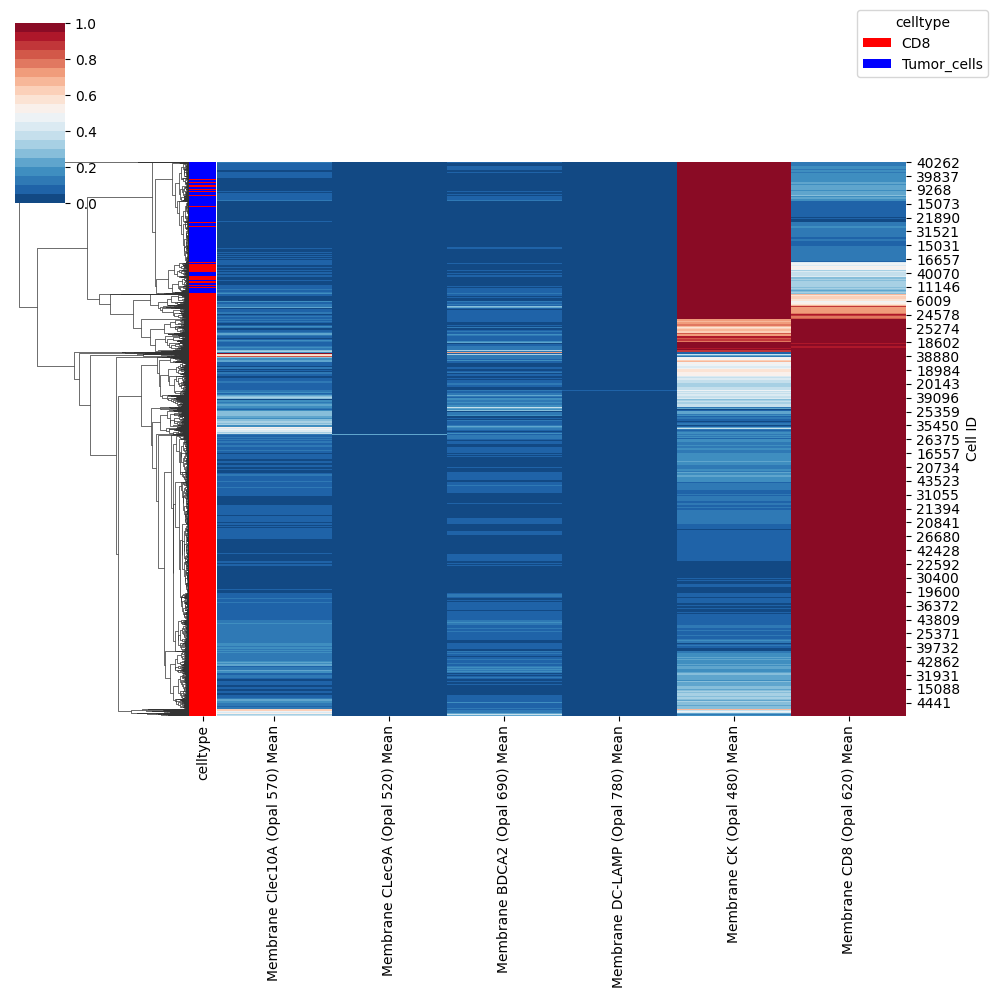

In [12]:
celltype_to_plot = ["Tumor_cells", "CD8", "Pneumocytes"]

clustermap(df_clean, celltype_to_plot, "celltype")

In [13]:
test

NameError: name 'test' is not defined

In [14]:
def densityplot(df, keys, key_column, x, y):
    
    temp = df.copy()

    rows_to_keep = [i for i in temp.index if temp.loc[i, key_column] in keys]
    temp2 = temp.loc[rows_to_keep, :]
    
    sns.displot(temp2, x=x, y=y, log_scale = True, kind = "kde", hue = key_column)

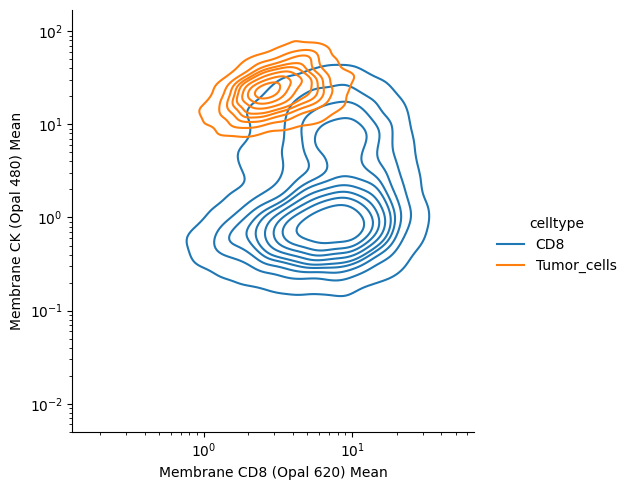

In [15]:
densityplot(df_clean, celltype_to_plot, "celltype", x = "Membrane CD8 (Opal 620) Mean", y = "Membrane CK (Opal 480) Mean")

# Ipywidgets

In [16]:
import ipywidgets as widgets

In [17]:
celltypes = np.unique(df_clean["celltype"])

test = widgets.SelectMultiple(
    options=celltypes,
    rows=len(celltypes),
    description='Cell type',
    disabled=False
)


display(test)

SelectMultiple(description='Cell type', options=('CD8', 'Mature_DC', 'Other+', 'Pneumocyte', 'Tumor_cells', 'c…

In [18]:
print(test.value)

()


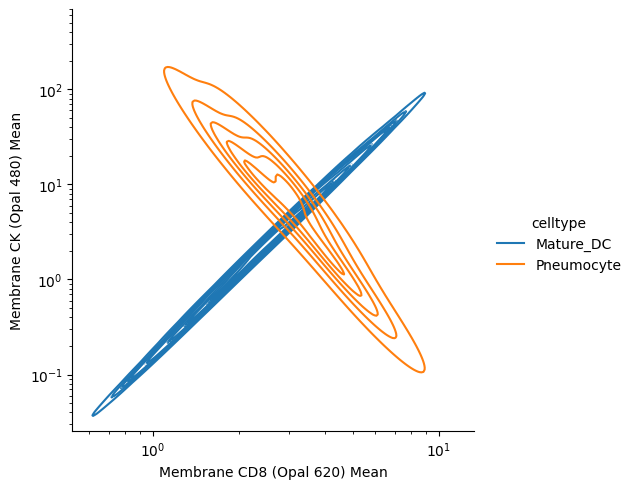

In [20]:
densityplot(df_clean, test.value, "celltype", x = "Membrane CD8 (Opal 620) Mean", y = "Membrane CK (Opal 480) Mean")

In [21]:
%matplotlib inline
from ipywidgets import interact

def f(var):
    sns.histplot(np.random.normal(1, var, 1000))
    plt.show()
interact(f, var = (1,10))

interactive(children=(IntSlider(value=5, description='var', max=10, min=1), Output()), _dom_classes=('widget-i…

<function __main__.f(var)>

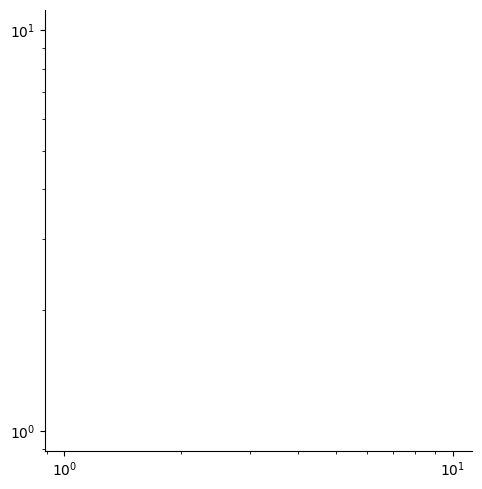

interactive(children=(SelectMultiple(description='Cell type', index=(0, 1), options=('CD8', 'Mature_DC', 'Othe…

<function __main__.densityplot_interact(celltype_to_plot, x, y)>

In [22]:
def densityplot_interact(celltype_to_plot, x, y):
    densityplot(df_clean, celltype_to_plot, "celltype", x, y)

cols = df_clean.columns
celltypes = np.unique(df_clean["celltype"])


x_select = widgets.Dropdown(
    options = cols,
    value = cols[0],
    description='x:',
    disabled=False,
)

y_select = widgets.Dropdown(
    options = cols,
    value = cols[1],
    description='y:',
    disabled=False,
)

celltype_select = widgets.SelectMultiple(
    options=celltypes,
    rows=len(celltypes),
    value = tuple(celltypes[0:2]),
    description='Cell type',
    disabled=False
)

interact(densityplot_interact, x = x_select, y = y_select, celltype_to_plot = celltype_select)